In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sklearn
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn.model_selection import train_test_split

In [2]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
## 拦截异常
warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)

In [3]:
## 读取数据
path1 = "datas/winequality-red.csv"
df1 = pd.read_csv(path1, sep=";")
df1['type'] = 1 # 设置数据类型为红葡萄酒

path2 = "datas/winequality-white.csv"
df2 = pd.read_csv(path2, sep=";")
df2['type'] = 2 # 设置数据类型为白葡萄酒

# 合并两个df
df = pd.concat([df1,df2], axis=0)

## 自变量名称
names = ["fixed acidity","volatile acidity","citric acid",
         "residual sugar","chlorides","free sulfur dioxide",
         "total sulfur dioxide","density","pH","sulphates",
         "alcohol", "type"]

## 因变量名称
quality = "quality"

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [11]:
names1=[]
for i in list(df):
    names1.append(i)
print(names1)
#print(df.columns)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type']


In [6]:
## 异常数据处理
new_df = df.replace('?', np.nan)
datas = new_df.dropna(how = 'any') # 只要有列为空，就进行删除操作

X = datas[names]
Y = datas[quality]
Y.ravel()

array([5, 5, 5, ..., 6, 7, 6], dtype=int64)

In [7]:
## 创建模型列表
models = [
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', LinearRegression())
        ]),
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', RidgeCV(alphas=np.logspace(-4, 2, 20)))
        ]),
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', LassoCV(alphas=np.logspace(-4, 2, 20)))
        ]),
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', ElasticNetCV(alphas=np.logspace(-4,2, 20), l1_ratio=np.linspace(0, 1, 5)))
        ])
]

线性回归预测:1阶, 截距:104, 系数: [ 0.00000000e+00  8.50118207e-02 -1.48620723e+00 -6.90416760e-02
  6.23516751e-02 -7.18643184e-01  4.99059722e-03 -1.45047299e-03
 -1.03460590e+02  4.97432666e-01  7.21153860e-01  2.23033948e-01
 -3.51639435e-01]
线性回归预测:2阶, 截距:-926, 系数: [-1.53328663e-05 -2.75607378e+01  1.01172114e+02  2.48363269e+02
 -1.75937002e+01 -1.15256738e+03 -2.47657152e+00  9.08814008e-01
  1.51673143e+03  1.22648432e+02  5.79953109e+01  2.03593913e+01
  1.55559269e+01 -4.34318334e-02  3.31320945e-02  4.24739822e-01
 -2.31878257e-02 -2.40247894e+00 -7.35719334e-05  3.64009507e-04
  2.78865438e+01  9.27783425e-02  2.07233707e-01  1.34480742e-02
  5.45491074e-02  4.37670832e-01  8.75879632e-01 -3.84236404e-02
  1.10461091e+00  5.84956239e-03  7.21047496e-03 -1.09383486e+02
  9.44208780e-01  3.90477722e-01  3.15802919e-01 -1.20298473e+00
 -1.04158882e+00  6.70367332e-02  6.55542659e+00  8.39269378e-03
 -5.18668347e-04 -2.58961482e+02  1.54314156e+00 -5.12297705e-01
 -1.24440987e-02  6.56758

线性回归预测:4阶, 截距:-27612, 系数: [-31021.58145246   2131.44110488 -10855.38228891 ...    571.29819016
  -4003.05479655   9975.5906414 ]
线性回归预测:5阶, 截距:-1230, 系数: [ -2.02709443   2.68307417 -23.98919127 ...  11.71904648  15.1959951
   6.68502406]
Ridge回归预测:1阶, 截距:97, 系数: [ 0.00000000e+00  7.86755928e-02 -1.49113927e+00 -7.15405676e-02
  5.94568794e-02 -7.36667048e-01  5.03889471e-03 -1.47691742e-03
 -9.58443547e+01  4.67880920e-01  7.11182899e-01  2.31299971e-01
 -3.35486409e-01]
Ridge回归预测:2阶, 截距:17, 系数: [ 0.00000000e+00 -4.06711716e+00 -3.30154108e+00 -2.82415203e+00
 -1.22945138e+01  5.59698948e+00 -2.33118238e+00  1.84163539e+00
 -5.12238231e-01 -6.44064089e-01 -1.42645527e+00  5.91308847e+00
 -1.38301035e-01 -2.53179282e-02 -3.07639207e-02  1.48589399e-01
 -9.26883176e-03 -5.77252341e-01 -3.09591647e-04  1.23236026e-03
  4.59956777e+00  3.81999154e-02  1.42485268e-01 -1.16999416e-02
 -1.14696293e-01  1.76209316e-01  7.07768149e-01 -6.05740477e-02
  1.75150321e+00  4.99037571e-03  8.86674780

Ridge回归预测:4阶, 截距:-604989, 系数: [ 0.         -0.05067504  0.02450217 ...  0.02101913 -0.12178519
 -0.00595348]
Ridge回归预测:5阶, 截距:-30926867559, 系数: [ 0.          0.00598631  0.00351602 ...  0.07624029 -0.03210781
 -0.0305242 ]
Lasso回归预测:1阶, 截距:2, 系数: [ 0.00000000e+00 -9.99954311e-04 -1.54652869e+00 -9.88385610e-02
  2.30340861e-02 -8.34519554e-01  5.66478007e-03 -1.81751117e-03
 -0.00000000e+00  9.66044997e-02  5.75183346e-01  3.36078614e-01
 -1.25733560e-01]
Lasso回归预测:2阶, 截距:6, 系数: [ 0.00000000e+00  3.63579033e-01 -0.00000000e+00 -0.00000000e+00
  1.01900783e-01  0.00000000e+00 -4.95518209e-02  4.51064454e-03
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.91782929e-01
 -0.00000000e+00 -1.50534103e-02 -1.54964458e-01 -4.77724150e-02
  7.78550773e-03 -0.00000000e+00  7.47394744e-04 -6.87033715e-05
  1.38802197e-01  3.74028713e-02  8.08958906e-02 -1.76044981e-02
 -1.41739052e-01 -0.00000000e+00  0.00000000e+00 -8.71000258e-03
  0.00000000e+00 -2.07149252e-03  6.86527416e-03 -0.00000000e

Lasso回归预测:4阶, 截距:4, 系数: [ 0.  0. -0. ... -0. -0. -0.]
Lasso回归预测:5阶, 截距:4, 系数: [ 0.  0. -0. ... -0. -0. -0.]


D:\Anaconda\Initial\lib\site-packages\sklearn\linear_model\coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


ElasticNet预测:1阶, 截距:2, 系数: [ 0.00000000e+00 -3.90561217e-04 -1.54502094e+00 -1.02627764e-01
  2.32270541e-02 -8.53392514e-01  5.66252559e-03 -1.81072304e-03
 -4.19137576e-01  1.00980373e-01  5.78686888e-01  3.35621847e-01
 -1.26777255e-01]


D:\Anaconda\Initial\lib\site-packages\sklearn\linear_model\coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


ElasticNet预测:2阶, 截距:9, 系数: [ 0.00000000e+00  3.02044485e-01 -2.58401712e-01 -2.81551068e-01
  1.18507985e-01  4.81673987e-01 -4.95319930e-02  5.18971638e-03
 -2.61396209e-01 -2.98224701e-02 -2.96474510e-02 -2.33270500e-01
  3.86287745e-01 -1.89775532e-02 -1.74253680e-01 -1.27585829e-02
  7.30925241e-03 -5.44128110e-02  6.25081850e-04 -6.26264542e-06
  3.02594943e-01  4.30137338e-02  9.79518448e-02 -1.98949623e-02
 -1.67455794e-01  1.93091392e-01  6.42144715e-01 -6.96138969e-03
  2.42622243e-01 -1.84595673e-03  6.55343103e-03 -2.31469174e-01
 -5.78634411e-01 -8.57075800e-02  3.81053294e-01 -1.62589996e+00
 -8.42413819e-01 -2.74067069e-02  6.34656100e-01  6.27945150e-03
 -6.77208665e-04 -5.05797906e-01 -4.32634830e-01 -7.52316510e-01
  2.27507486e-01  3.75891506e-01 -4.64619386e-04 -1.25806809e-01
 -7.97318637e-04  2.19081014e-04  1.35819327e-02 -4.37993580e-02
 -1.24576233e-02  2.09412094e-04  3.24256237e-03  4.13898699e-01
  1.87884140e-02 -5.91408426e-03  4.39329816e-01  8.33281594e-0

D:\Anaconda\Initial\lib\site-packages\sklearn\linear_model\coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


ElasticNet预测:3阶, 截距:4, 系数: [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+0

D:\Anaconda\Initial\lib\site-packages\sklearn\linear_model\coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


ElasticNet预测:4阶, 截距:4, 系数: [ 0.00000000e+00  1.09328770e-05 -2.60992873e-06 ... -3.79993173e-04
 -1.63444598e-04 -4.97355080e-05]


KeyboardInterrupt: 

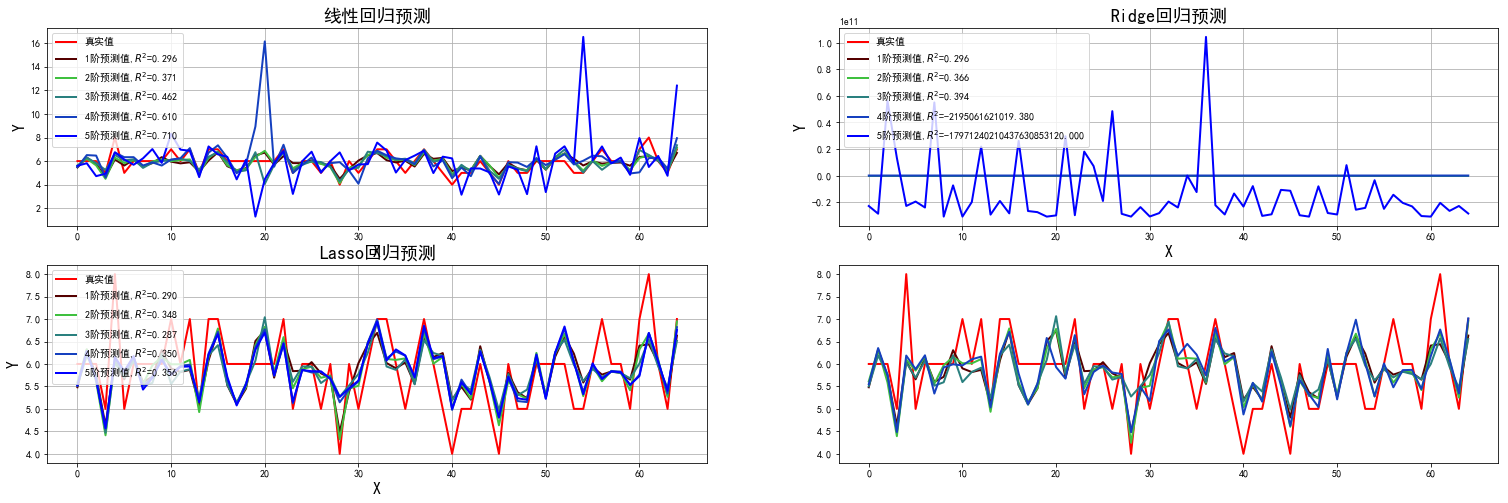

In [9]:
plt.figure(figsize=(26,8), facecolor='w')
titles = u'线性回归预测', u'Ridge回归预测', u'Lasso回归预测', u'ElasticNet预测'

## 将数据分为训练数据和测试数据
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.01, random_state=0)
ln_x_test = range(len(X_test))

## 给定阶以及颜色
d_pool = np.arange(1,4,1) # 1 2 3 阶， 要到5阶则计算量太大了，有点慢
m = len(d_pool)
clrs = [] # 颜色
for c in np.linspace(5570560, 255, m):
    clrs.append('#%06x' % int(c))


for t in range(4):
    plt.subplot(2, 2, t + 1)
    model = models[t]
    plt.plot(ln_x_test, Y_test, c='r', lw=2, label=u'真实值')
    for i,d in enumerate(d_pool):
        # 设置参数
        model.set_params(Poly__degree=d)
        # 模型训练
        model.fit(X_train, Y_train)
        # 模型预测及计算R^2
        Y_pre = model.predict(X_test)#在fit(模型计算)完了之后，就可以进行预测了
        R = model.score(X_train, Y_train)
        # 输出信息
        lin = model.get_params()['Linear']
        output = u"%s:%d阶, 截距:%d, 系数:" % (titles[t], d, lin.intercept_)
        print(output,lin.coef_)
        ## 图形展示
        plt.plot(ln_x_test, Y_pre, c=clrs[i], lw=2, label=u'%d阶预测值,$R^2$=%.3f' % (d,R))
    plt.legend(loc = 'upper left')
    plt.grid(True)
    plt.title(titles[t], fontsize=18)
    plt.xlabel('X', fontsize=16)
    plt.ylabel('Y', fontsize=16)
plt.suptitle(u'葡萄酒质量预测', fontsize=22)
plt.show()